In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\us_change.csv"

df = pd.read_csv(path)
df.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1


In [3]:
df['date'] = pd.to_datetime(df['Quarter'].str.replace(r'Q1', '03')
                                       .str.replace(r'Q2', '06')
                                       .str.replace(r'Q3', '09')
                                       .str.replace(r'Q4', '12'),
                            format='%Y %m') + pd.offsets.MonthEnd(0)

df.head()

,Quarter,Consumption,Income,Production,Savings,Unemployment,date
0,1970 Q1,0.618566,1.044801,-2.452486,5.299014,0.9,1970-03-31
1,1970 Q2,0.451984,1.225647,-0.551459,7.789894,0.5,1970-06-30
2,1970 Q3,0.872872,1.585154,-0.358652,7.403984,0.5,1970-09-30
3,1970 Q4,-0.271848,-0.239545,-2.185691,1.169898,0.7,1970-12-31
4,1971 Q1,1.901345,1.975925,1.909764,3.535667,-0.1,1971-03-31


In [4]:
us_long = df.melt(id_vars=['date'], value_vars=['Consumption', 'Income'], 
                         var_name='Series', value_name='Value')
us_long.head()

,date,Series,Value
0,1970-03-31,Consumption,0.618566
1,1970-06-30,Consumption,0.451984
2,1970-09-30,Consumption,0.872872
3,1970-12-31,Consumption,-0.271848
4,1971-03-31,Consumption,1.901345


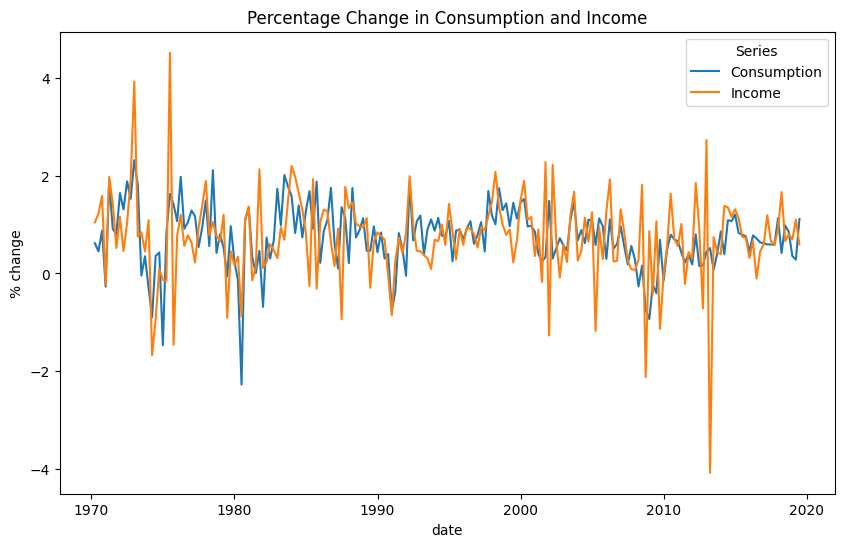

In [5]:
# Graficamos los datos en formato largo
plt.figure(figsize=(10, 6))
sns.lineplot(data=us_long, x='date', y='Value', hue='Series')

# Añadimos etiquetas y título
plt.ylabel("% change")
plt.title("Percentage Change in Consumption and Income")
plt.legend(title="Series")
plt.show()

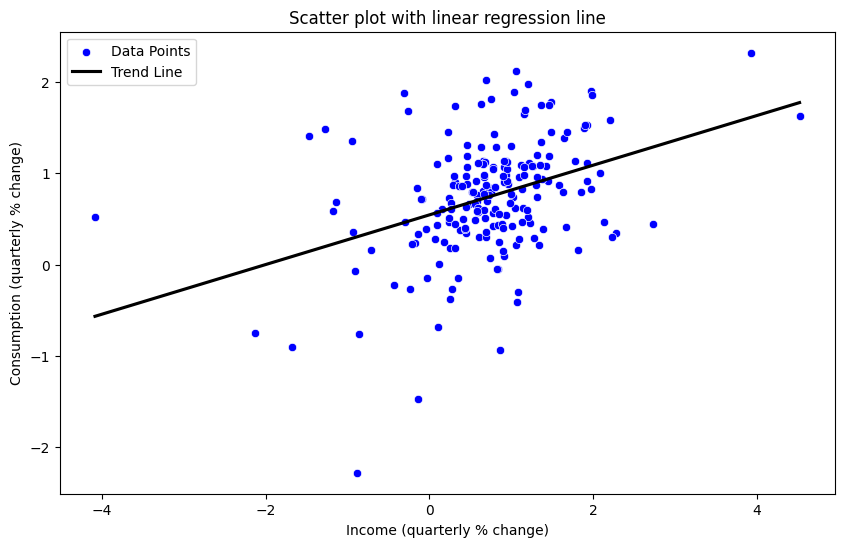

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos el gráfico
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con color para los puntos
sns.scatterplot(data=df, x='Income', y='Consumption', color='blue', label='Data Points')

# Línea de regresión con color diferente
sns.regplot(data=df, x='Income', y='Consumption', scatter=False, color='black', ci=None, label='Trend Line')  

# Etiquetas
plt.ylabel("Consumption (quarterly % change)")
plt.xlabel("Income (quarterly % change)")
plt.title("Scatter plot with linear regression line")

# Agregamos la leyenda
plt.legend()

plt.show()

In [7]:
import statsmodels.api as sm
import pandas as pd

# Supongamos que `us_change` es tu DataFrame con las columnas 'Consumption' e 'Income'

# Agregar una constante para el término de intersección
X = df['Income']
X = sm.add_constant(X)  # Esto agrega una columna de 1s para el intercepto

# Definir la variable dependiente
y = df['Consumption']

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Generar un resumen del modelo
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Consumption   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     33.84
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.40e-08
Time:                        18:00:32   Log-Likelihood:                -175.65
No. Observations:                 198   AIC:                             355.3
Df Residuals:                     196   BIC:                             361.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5445      0.054     10.079      0.000       0.438       0.651
Income         0.2718      0.047      5.817      0.000       0.180       0.364
==============================================================================
Omnibus:                       19.675   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.285
Skew:                          -0.476   Prob(JB):                     2.95e-09
Kurtosis:                       4.964   Cond. No.                         2.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

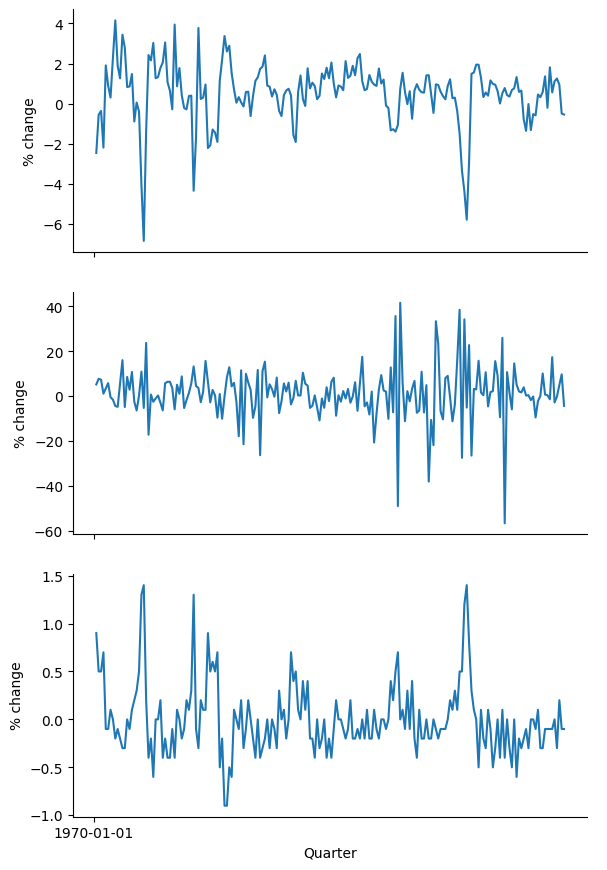

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que `us_change` es tu DataFrame
# Eliminamos las columnas 'Consumption' e 'Income' y hacemos un `melt`
df_long = df.drop(columns=['Consumption', 'Income', 'Quarter']).melt(id_vars='date', var_name='name', value_name='value')

# Crear el gráfico con FacetGrid
g = sns.FacetGrid(df_long, col='name', col_wrap=1, sharey=False, height=3, aspect=2)
g.map_dataframe(sns.lineplot, x='date', y='value')  # Eliminamos `palette='tab10'`
g.set_titles("{col_name}")
g.set_axis_labels("Quarter", "% change")
g.add_legend()
g.set_titles("")

# Ajustar el espaciado del eje x usando step
step = 1000 # Cada 12 puntos en el eje
x_ticks = range(0, len(df_long), step)

# Aplicar los xticks a cada subgráfico
for ax in g.axes.flat:
    ax.set_xticks(x_ticks)

plt.show()


In [9]:
df_long

,date,name,value
0,1970-03-31,Production,-2.452486
1,1970-06-30,Production,-0.551459
2,1970-09-30,Production,-0.358652
3,1970-12-31,Production,-2.185691
4,1971-03-31,Production,1.909764
...,...,...,...
589,2018-06-30,Unemployment,0.000000
590,2018-09-30,Unemployment,-0.300000
591,2018-12-31,Unemployment,0.200000
592,2019-03-31,Unemployment,-0.100000


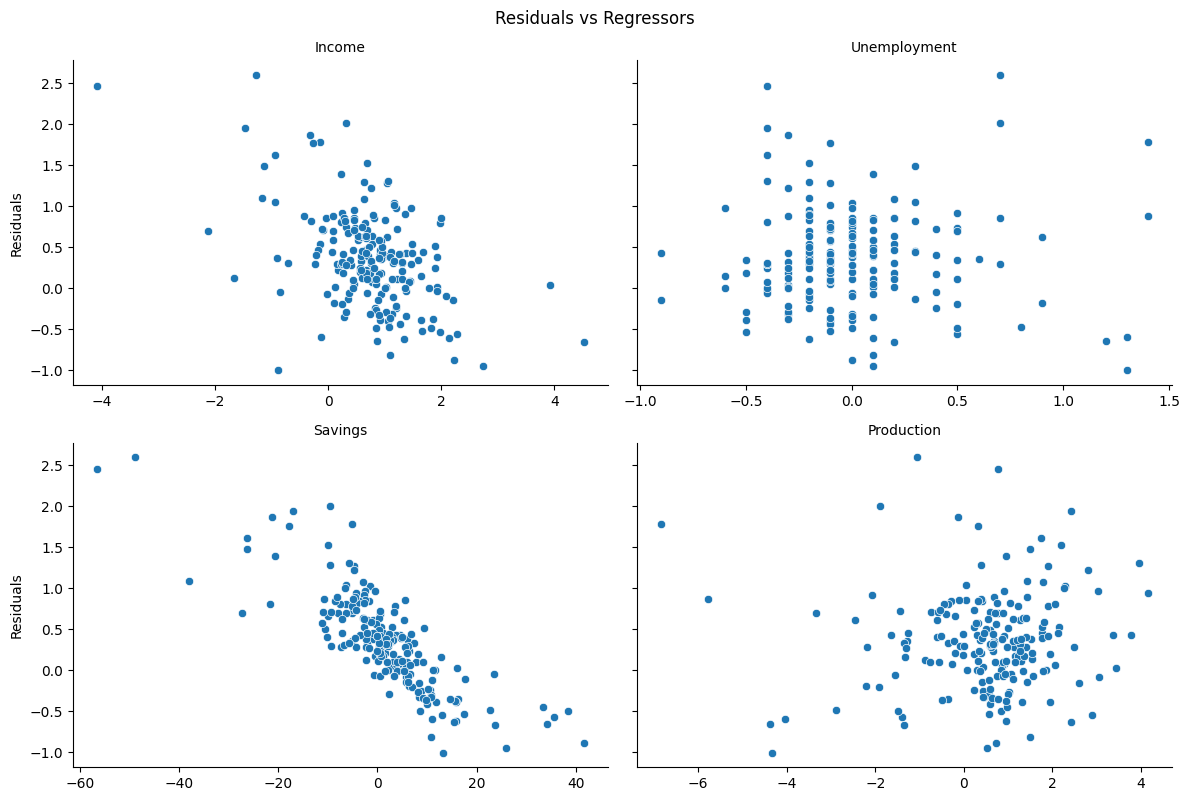

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.api import OLS

# Asumiendo que `us_change` es tu DataFrame original y tiene una columna 'Quarter'
# Y que 'Income', 'Unemployment' son variables en `us_change` usadas en el modelo
# Ajustamos un modelo de ejemplo para obtener residuos (ajusta según tu modelo)
fit_consMR = OLS(df['Consumption'], df[['Income', 'Unemployment']]).fit()
df['residuals'] = fit_consMR.resid  # Añade los residuos al DataFrame

# Transformar el DataFrame al formato largo
df_long = df.melt(id_vars=['Quarter', 'residuals'], value_vars=['Income', 'Unemployment', 'Savings', 'Production'],
                         var_name='regressor', value_name='x')

# Crear el gráfico
g = sns.FacetGrid(df_long, col='regressor', col_wrap=2, sharex=False, height=4, aspect=1.5)
g.map_dataframe(sns.scatterplot, x='x', y='residuals')
g.set_axis_labels("", "Residuals")
g.set_titles("{col_name}")
plt.suptitle("Residuals vs Regressors", y=1.02)  # Título general del gráfico
plt.show()


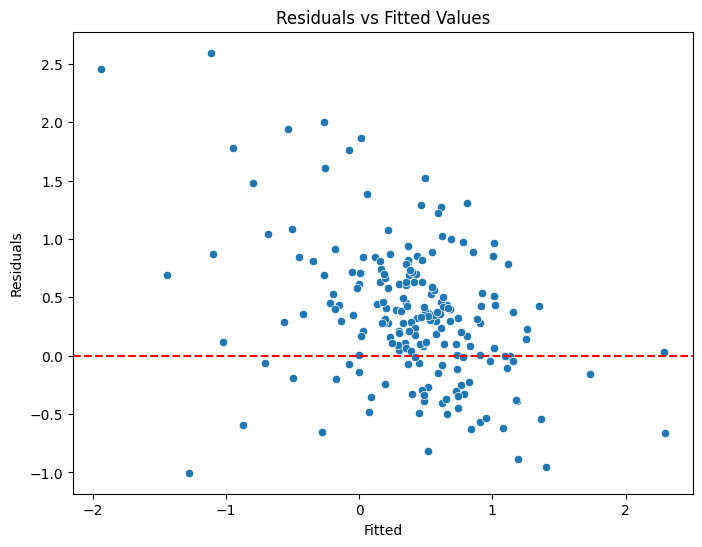

In [11]:
# Asumiendo que `us_change` es tu DataFrame y que has ajustado el modelo `fit_consMR`
# Ajuste de un modelo de ejemplo para obtener residuos y valores ajustados
fit_consMR = OLS(df['Consumption'], df[['Income', 'Unemployment']]).fit()

# Crear un DataFrame con los valores ajustados y residuos
df_augmented = pd.DataFrame({
    'Fitted': fit_consMR.fittedvalues,
    'Residuals': fit_consMR.resid
})

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_augmented, x='Fitted', y='Residuals')
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en y=0
plt.xlabel("Fitted")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.show()


In [14]:
path2 = r"C:\Users\HP\OneDrive\Escritorio\David Guzzi\Github\TSA\Forecasting Principles and Practice 3rd\2\aus_production.csv"
ap = pd.read_csv(path2)
ap.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5


In [15]:
ap['date'] = pd.to_datetime(ap['Quarter'].str.replace(r'Q1', '03')
                                       .str.replace(r'Q2', '06')
                                       .str.replace(r'Q3', '09')
                                       .str.replace(r'Q4', '12'),
                            format='%Y %m') + pd.offsets.MonthEnd(0)
ap['year'] = ap['date'].dt.year
ap.head(1)

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas,date,year
0,1956 Q1,284,5225.0,189.0,465,3923,5,1956-03-31,1956


In [ ]:
# Graficamos los datos en formato largo
plt.figure(figsize=(10, 6))
sns.lineplot(data=us_long, x='date', y='Value', hue='Series')

# Añadimos etiquetas y título
plt.ylabel("% change")
plt.title("Percentage Change in Consumption and Income")
plt.legend(title="Series")
plt.show()